# Map interface

In [1]:
import mappy as mp
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
water_table_depth = mp.Map("data/wtd.tif")

to visualise where the data is located

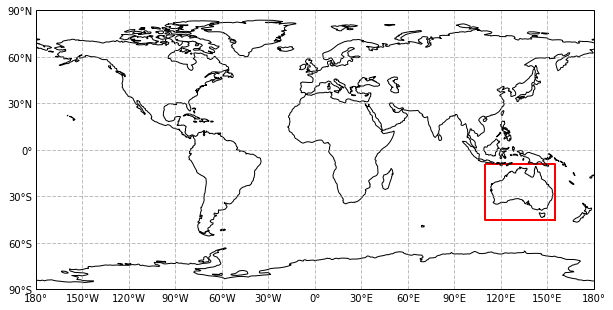

In [3]:
water_table_depth.plot_world()

splitting the data up in four tiles:

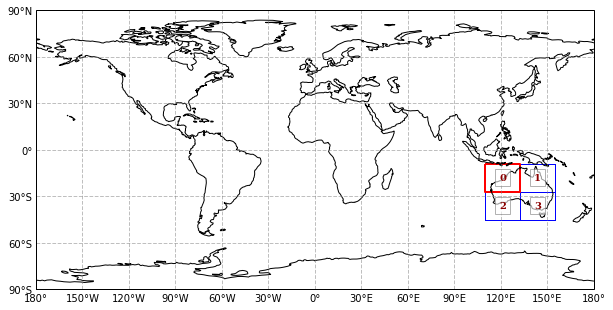

In [4]:
water_table_depth.tiles=4
water_table_depth.plot_world(numbers=True)

obtain the data in the third tile:

In [5]:
water_table_depth[2]

array([[         nan,          nan,          nan, ..., 139.19279774,
        172.89997711, 143.0685893 ],
       [         nan,          nan,          nan, ...,  98.68009461,
        146.66971847, 110.82627604],
       [         nan,          nan,          nan, ..., 153.90249485,
        105.89761196, 134.27939269],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

or in specific bounds

In [6]:
water_table_depth[(120, -30, 130, -20)] #x0, y0, x1, y1

array([[29.84664683, 21.34737163, 15.97619593, ..., 23.33104448,
        21.08796826, 19.33318074],
       [26.4133669 , 19.88250553, 15.39635309, ..., 21.57625696,
        20.08087282, 18.70756085],
       [20.11139086, 17.50209812, 15.77782864, ..., 19.9282826 ,
        18.84489204, 18.24979019],
       ...,
       [64.56092164, 58.71671626, 57.69436179, ..., 19.85198749,
        20.05035477, 20.32501717],
       [69.00129702, 64.43884947, 67.49065385, ..., 19.74517433,
        19.63836118, 20.17242695],
       [77.89730678, 71.97680629, 73.16700999, ..., 21.71358816,
        20.56916152, 20.78278782]])

and this location can also be visualised on the global map using the same indices:

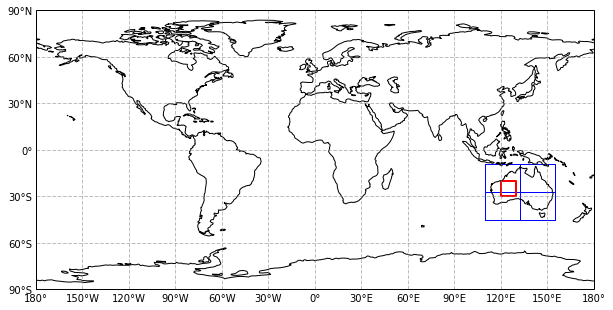

In [7]:
water_table_depth.plot_world((120, -30, 130, -20))

## Visualising the data

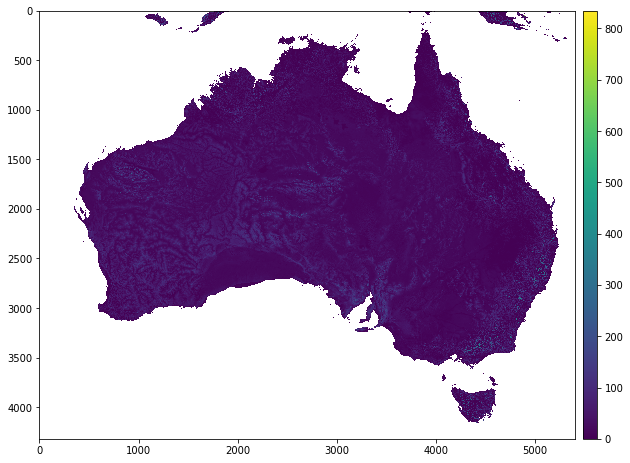

In [8]:
water_table_depth.plot()

This can be enhanced by adding a basemap

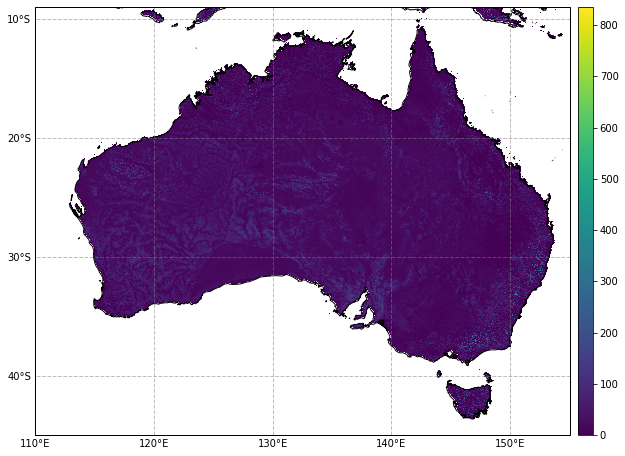

In [9]:
water_table_depth.plot(basemap=True, basemap_kwargs={'xticks':10, 'yticks':10, 'resolution':'10m'})

the standard `matplotlib` parameters for `plt.imshow` work here as well

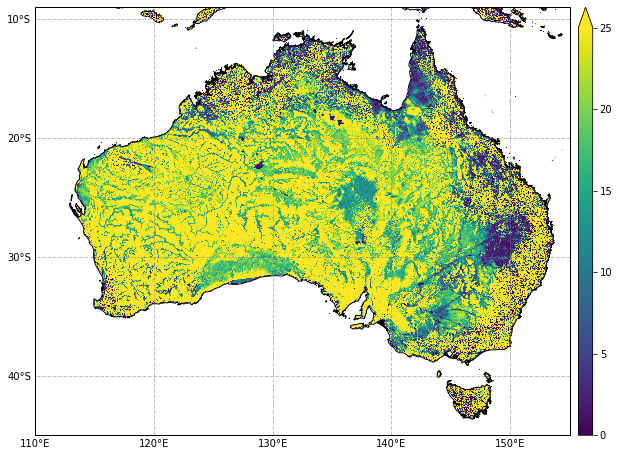

In [10]:
water_table_depth.plot(basemap=True, basemap_kwargs={'xticks':10, 'yticks':10, 'resolution':'10m'}, vmax=25)

As most values are quite close to 0, a more interesting map can be made by using the ``bin`` parameter

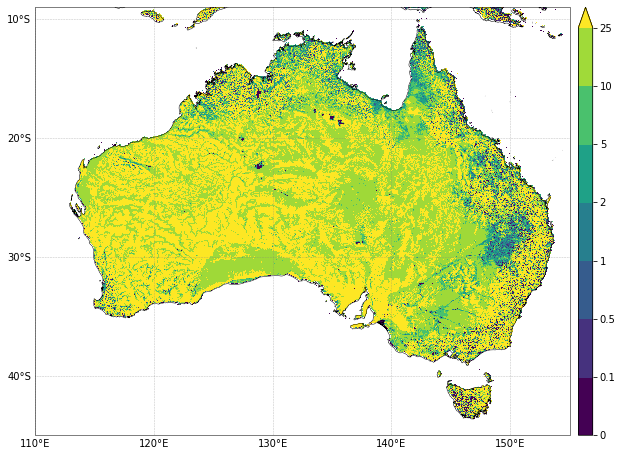

In [11]:
water_table_depth.plot(basemap=True, 
                       basemap_kwargs={'xticks':10, 'yticks':10, 'resolution':'10m','linewidth':0.5},
                       bins=[0,0.1,0.5,1,2,5,10,25])

And by specifiying a more intuitive `cmap`

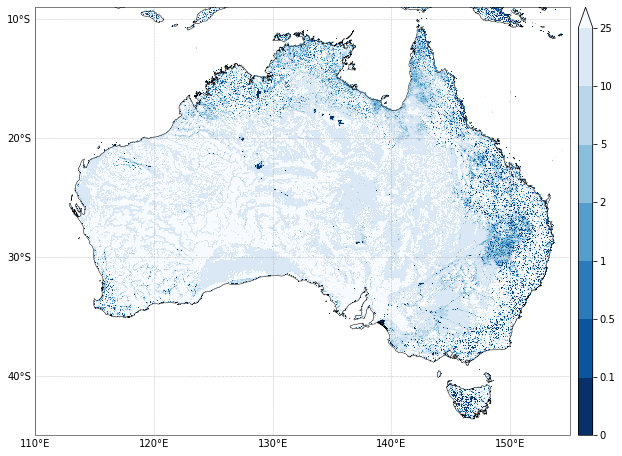

In [12]:
water_table_depth.plot(basemap=True, 
                       basemap_kwargs={'xticks':10, 'yticks':10, 'resolution':'10m','linewidth':0.5},
                       bins=[0,0.1,0.5,1,2,5,10,25],
                       cmap="Blues_r")

you can also choose to have a legend instead of a colorbar

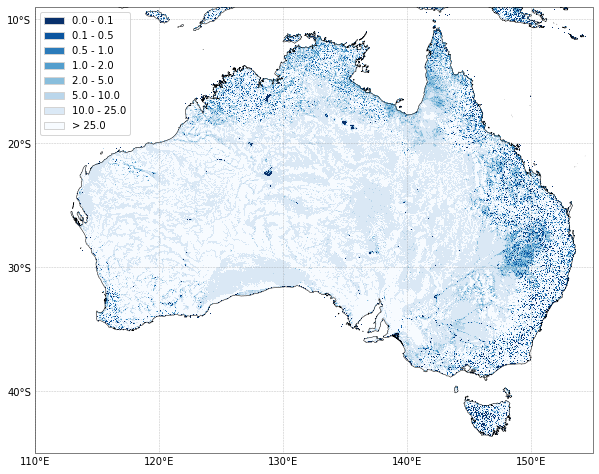

In [13]:
water_table_depth.plot(basemap=True, 
                       basemap_kwargs={'xticks':10, 'yticks':10, 'resolution':'10m','linewidth':0.5},
                       bins=[0,0.1,0.5,1,2,5,10,25],
                       cmap="Blues_r",
                       legend='legend',
                       legend_kwargs={'loc':2})

Or none at all

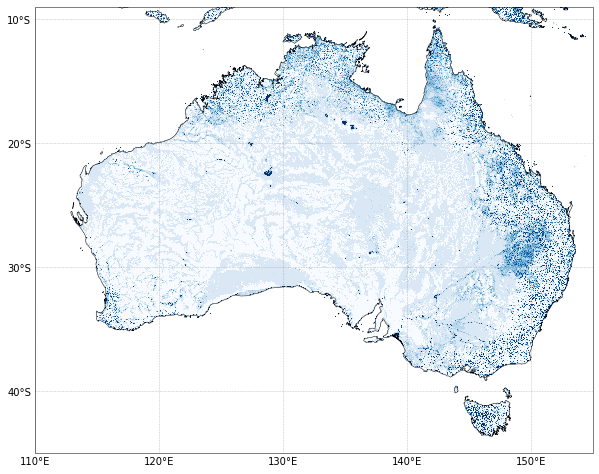

In [14]:
water_table_depth.plot(basemap=True, 
                       basemap_kwargs={'xticks':10, 'yticks':10, 'resolution':'10m','linewidth':0.5},
                       bins=[0,0.1,0.5,1,2,5,10,25],
                       cmap="Blues_r",
                       legend=False,
                       legend_kwargs={'loc':2})

A similar indexing approach as shown on the world maps is possible with the data as well:

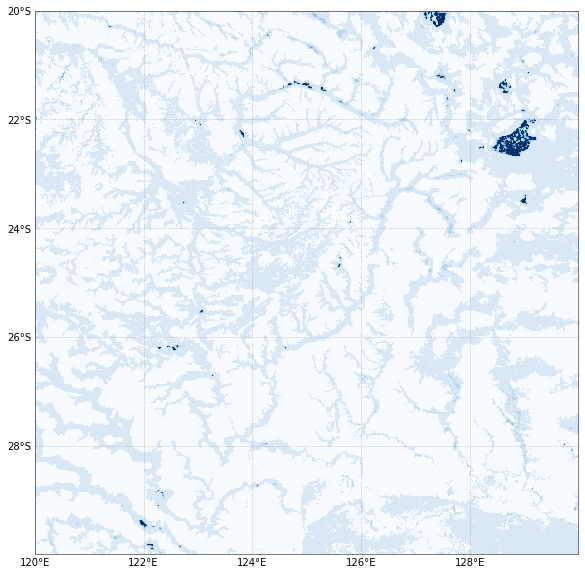

In [15]:
water_table_depth.plot(ind=(120, -30, 130, -20),
                       basemap=True, 
                       basemap_kwargs={'xticks':2, 'yticks':2, 'resolution':'10m','linewidth':0.5},
                       bins=[0,0.1,0.5,1,2,5,10,25],
                       cmap="Blues_r",
                       legend=False,
                       legend_kwargs={'loc':2})

To build these plots outside the class structure for more specific control the functions are exposed separataly

In [16]:
data = water_table_depth[(120, -30, 130, -20)]

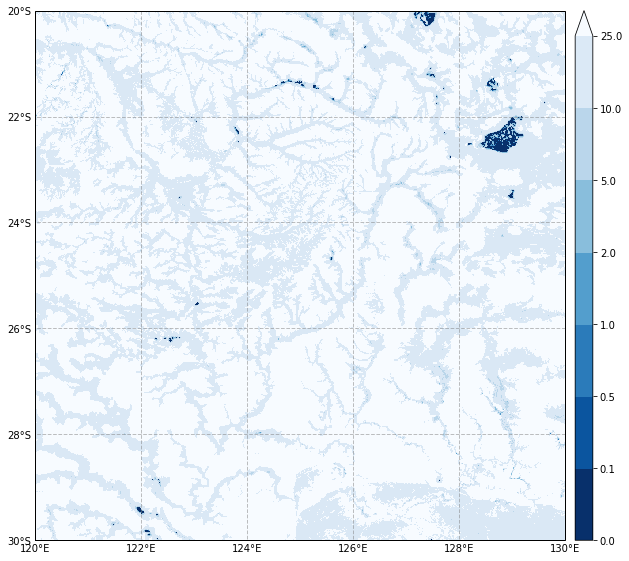

In [17]:
# create the basemap
ax = mp.basemap(x0=120,x1=130,y0=-30,y1=-20, xticks=2, yticks=2)
# call the plotting function
mp.plot_map(data, bins=[0,0.1,0.5,1,2,5,10,25], ax=ax, legend=False, cmap="Blues_r")
# add the colorbar separately
mp.add_colorbar(ax.images[-1], extend='max')

## Classified maps

this plotting routine works with continuous data but is slightly different with categorical data
in the following example, climate maps are shown which are stored as integer values in the raster

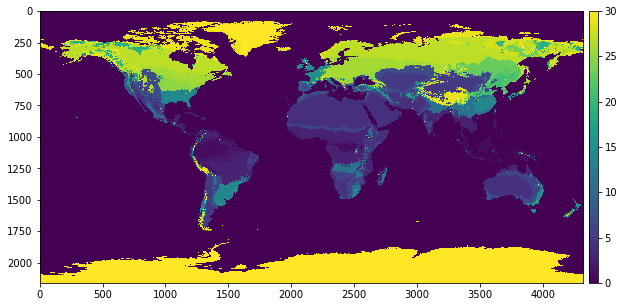

In [18]:
climate = mp.Map("data/climate_downsampled_10.tif")
climate.plot()

to show this in a better way, with the correct labels and colors (from the paper) the function
plot_classified_maps is implemented, which works similary to plot_maps above, but requires ``colors`` 
and ``labels``

In [19]:
colors = [(1, 1, 1)]
bins = [0]
labels = ["Water"]
with open("data/koppen_legend.txt") as f:
    for line in f:
        line = line.strip()
        try:
            int(line[0])
            rgb = [int(c) / 255 for c in line[line.find('[') + 1:-1].split()]
            colors.append(rgb)
            labels.append(line.split()[1])
            bins.append(int(line[:line.find(':')]))
        except:
            pass

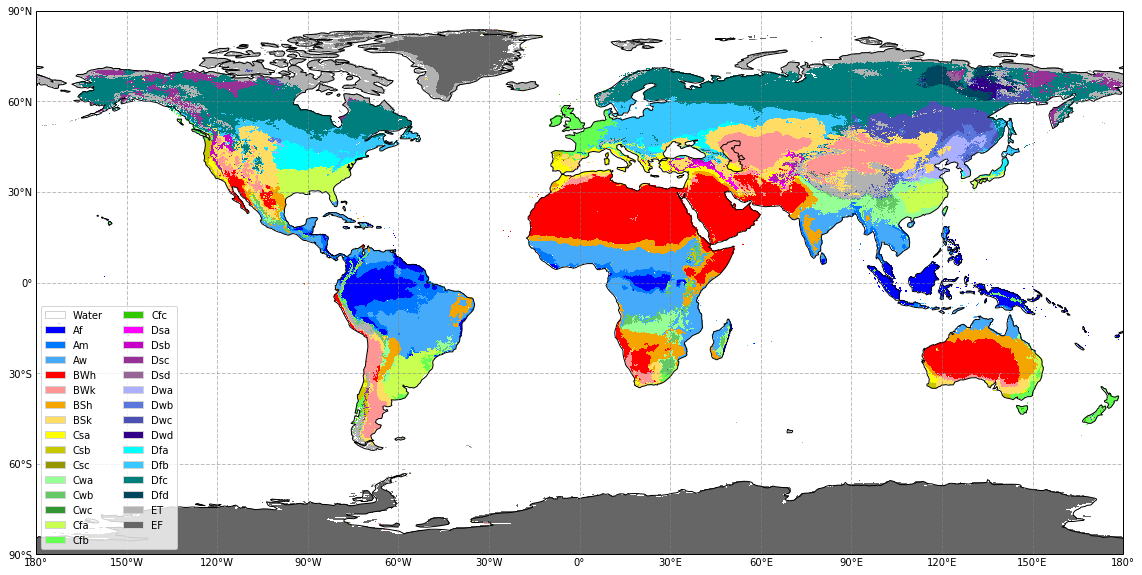

In [20]:
climate.plot_classified(basemap=True, bins=bins, colors=colors, labels=labels, suppress_warnings=True,
                       figsize=(20,10), legend_kwargs={'ncol':2, 'loc':3})

Alternatively the legend can be plotted as a colorbar as well if it is blocking information in the figure

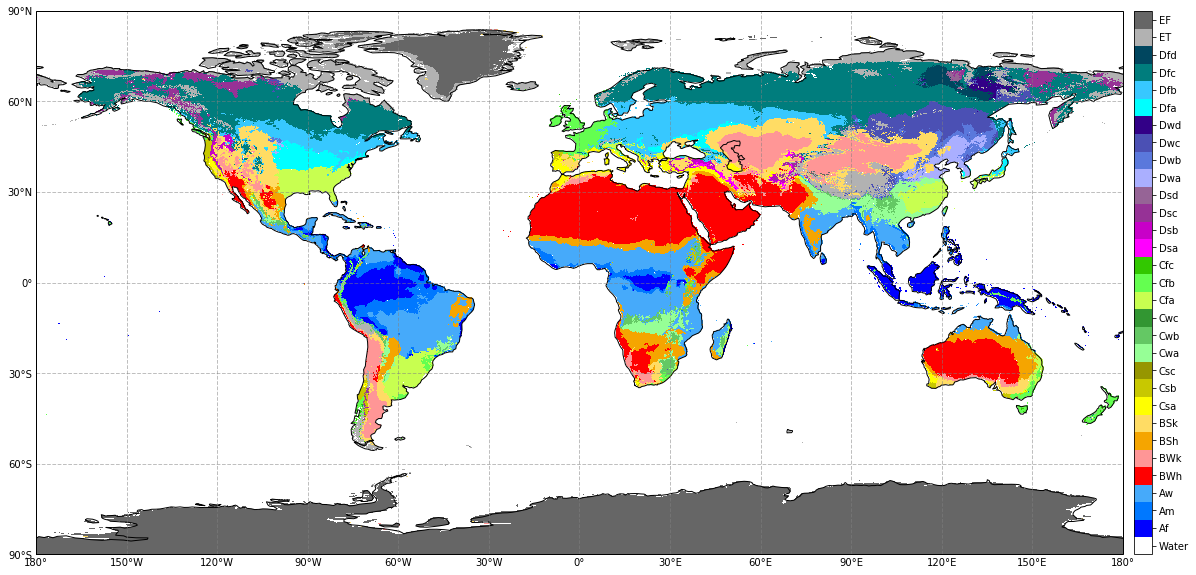

In [21]:
climate.plot_classified(basemap=True, figsize=(20,10), bins=bins, colors=colors, labels=labels, 
                        suppress_warnings=True, legend='colorbar')

if you are plotting an area without all classes present, it can be clipped

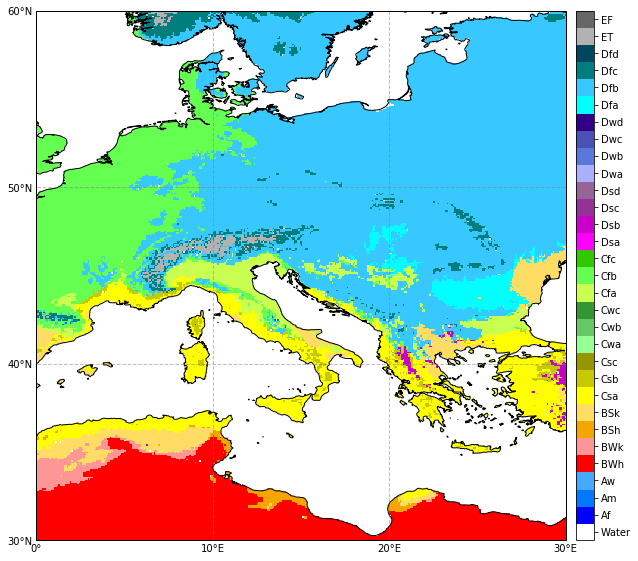

In [22]:
climate.plot_classified((0,30,30,60), basemap=True, basemap_kwargs={'resolution':'10m','xticks':10, 'yticks':10},
                        bins=bins, colors=colors, labels=labels, suppress_warnings=True, legend='colorbar')

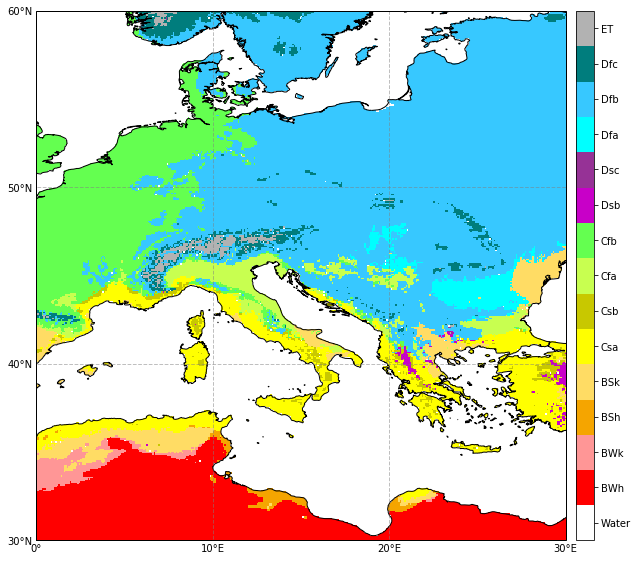

In [23]:
climate.plot_classified((0,30,30,60), basemap=True, basemap_kwargs={'resolution':'10m','xticks':10, 'yticks':10},
                        bins=bins, colors=colors, labels=labels, suppress_warnings=True, legend='colorbar',
                       clip_legend=True)

## Plotting shapes

with a similar syntax, based on geopandas, plots can be made

In [25]:
df = gpd.read_file('data/countries/plastic_mobilisation.shp')

/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


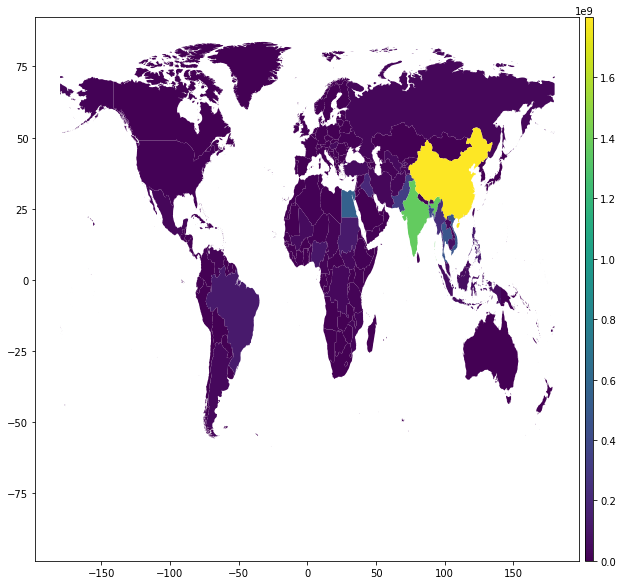

In [26]:
mp.plot_shapes(df=df, values='e_10')

with a basemap

/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


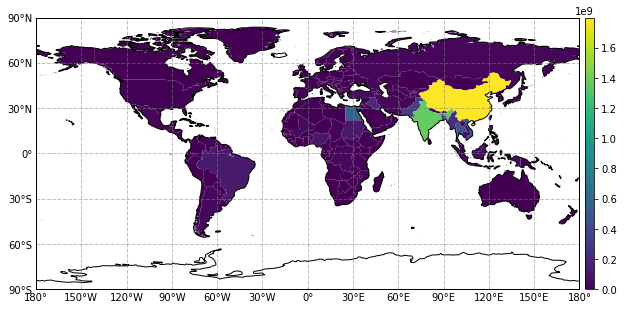

In [27]:
# creating the basemap
ax = mp.basemap(epsg=4326)
# plot the shapes
mp.plot_shapes(df=df, values='e_10', ax=ax)

with a more comprehensive colorscheme and bins like above

/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


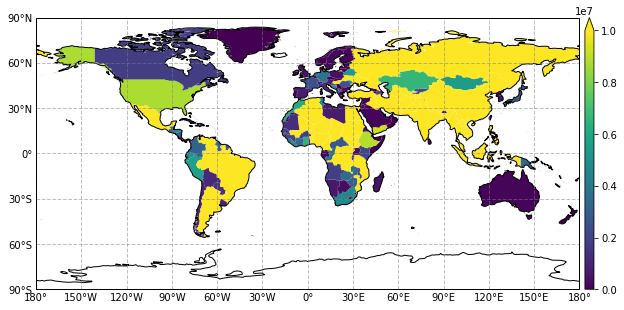

In [28]:
# creating the basemap
ax = mp.basemap(epsg=4326)
# plot the shapes
mp.plot_shapes(df=df, values='e_10', ax=ax, vmax=10000000)

/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1356: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= b] = i
/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1360: RuntimeWarning: invalid value encountered in less
  iret[xx < self.vmin] = -1
/Users/jroebroek/opt/anaconda3/envs/thesis/lib/python3.6/site-packages/matplotlib/colors.py:1361: RuntimeWarning: invalid value encountered in greater_equal
  iret[xx >= self.vmax] = max_col


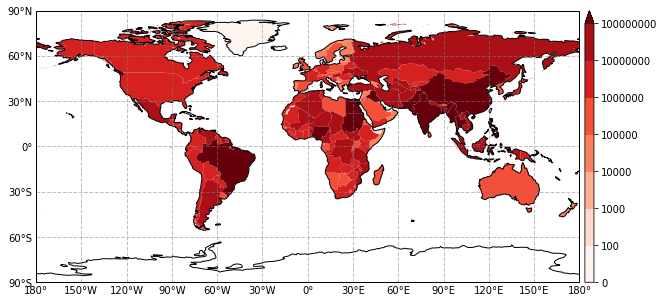

In [29]:
# creating the basemap
ax = mp.basemap(epsg=4326)
# plot the shapes
mp.plot_shapes(df=df, values='e_10', ax=ax, 
               bins=[0,100,1000,10000,100000,1000000, 10000000, 100000000], cmap="Reds")

This function also accepts ``lat``, ``lon`` and column of ``values`` and sizes ``s``

# Multiple maps

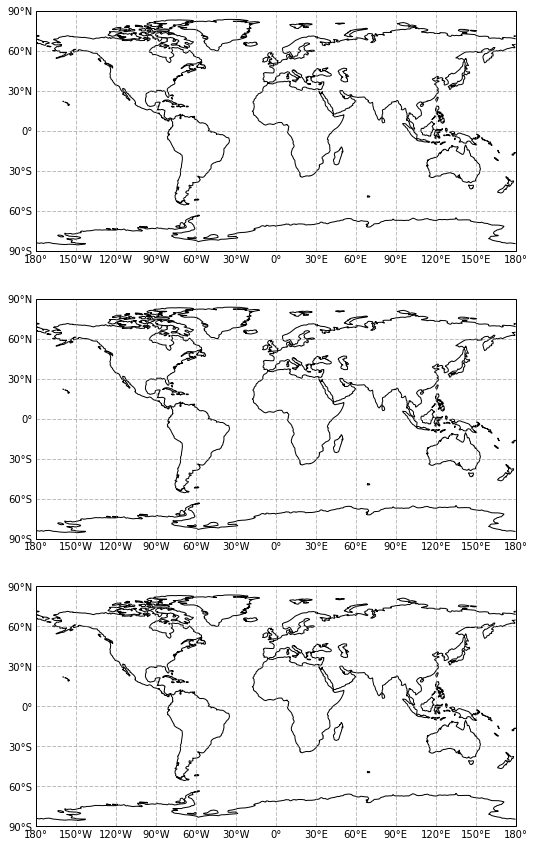

In [30]:
f, ax = plt.subplots(nrows=3, figsize=(15,15))
ax = ax.flatten()
ax = [mp.basemap(ax=cax) for cax in ax]

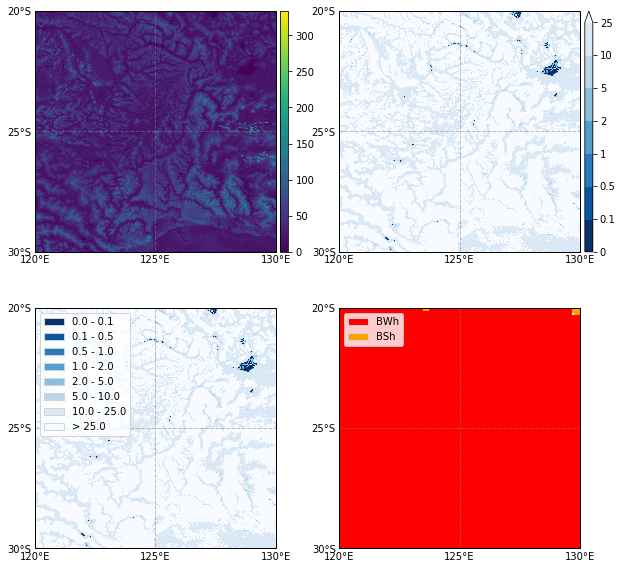

In [37]:
# Note force equal_figsize parameter in the last call. If not provided the axes 
# remains sligthly bigger and consequentially the map is slightly bigger than the others
ind = (120, -30, 130, -20)
f, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
ax = [mp.basemap(*ind, ax=cax, xticks=5, yticks=5) for cax in ax]
data = water_table_depth[ind]
mp.plot_map(data, ax=ax[0])
mp.plot_map(data, ax=ax[1], bins=[0,0.1,0.5,1,2,5,10,25], cmap='Blues_r')
mp.plot_map(data, ax=ax[2], bins=[0,0.1,0.5,1,2,5,10,25], legend='legend', cmap="Blues_r", legend_kwargs={'loc':2},
            force_equal_figsize=True)
mp.plot_classified_map(climate[ind], ax=ax[3], bins=bins, colors=colors, labels=labels, 
                       suppress_warnings=True, force_equal_figsize=True, 
                       legend_kwargs={'ncol':1, 'loc':2}, clip_legend=True)